<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
##ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_Etivity-2

In [1]:
#@title Current Date
Today = '2021-09-25' #@param {type:"date"}


In [2]:
#@markdown ---
#@markdown ### Enter your details here:
Student_ID = "19137338" #@param {type:"string"}
Student_full_name = "Rana Das" #@param {type:"string"}
#@markdown ---

In [3]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = 'Draft' #@param ["Draft", "Final"] {type:"raw"}
Submission = False #@param {type:"boolean"}

# INTRODUCTION

**Piecewise regression**, extract from [Wikipedia](https://en.wikipedia.org/wiki/Segmented_regression):

Segmented regression, also known as piecewise regression or broken-stick regression, is a method in regression analysis in which the independent variable is partitioned into intervals and a separate line segment is fit to each interval. 

* Segmented regression analysis can also be performed on 
multivariate data by partitioning the various independent variables. 
* Segmented regression is useful when the independent variables, clustered into different groups, exhibit different relationships between the variables in these regions. 

* The boundaries between the segments are breakpoints.

* Segmented linear regression is segmented regression whereby the relations in the intervals are obtained by linear regression. 

***The goal is to use advanced Machine Learning methods to predict House price.***

## Imports

In [4]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import arviz as az
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [6]:
# to plot
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D

# to generate classification, regression and clustering datasets
import sklearn.datasets as dt

# to create data frames
from pandas import DataFrame

# to generate data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [7]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

# DATASET

Extract from this [paper](https://ieeexplore.ieee.org/document/9300074):

* House prices are a significant impression of the economy, and its value ranges are of great concerns for the clients and property dealers. 

* Housing price escalate every year that eventually reinforced the need of strategy or technique that could predict house prices in future. 

* There are certain factors that influence house prices including physical conditions, locations, number of bedrooms and others.


1. [Download the dataset](https://github.com/UL-ET5003/ET5003_SEM1_2021-2/tree/main/Week-3). 

2. Upload the dataset into your folder.



The challenge is to predict the final price of each house.

### Loading Data

In [8]:
# Checking if using Google Colab (courtesy of Nigel Portley and  Michael McKegney).
RunningInCOLAB = 'google.colab' in str(get_ipython())

if RunningInCOLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    
    # paste the path here, keep quotation marks and the trailing slash
    Path = '/content/drive/MyDrive/Colab Notebooks/ET5003/e-tivity-2/'
    
else:
    
    Path = '.'

Mounted at /content/drive


In [9]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

# Path, copy the path from your Drive
# Path = '/content/drive/MyDrive/Colab Notebooks/ET5003/e-tivity-2/'

# House Data
train_data = Path + 'house_train.csv'
test_data = Path + 'house_test.csv'
cost_data = Path + 'true_price.csv'

# train data
df_train = pd.read_csv(train_data)

# test data
df_test = pd.read_csv(test_data)

# test data
df_cost = pd.read_csv(cost_data)

## Exploratory Data Analysis

Exploratory Data Analysis is an approach for Data Analysis that employs a variety of techniques to-


*   Gain intuition about the data.
*   Conduct sanity checks. (To be sure that insights we are drawing are actually from the right dataset).
*    Find out where data is missing.
*    Check if there are any outliers.
*    Summarize the data.

### Steps in Exploratory Data Analysis
<img src = "https://cdn.analyticsvidhya.com/wp-content/uploads/2020/10/image7-5.png"/>

In [10]:
print('Shape of Training Data : ', df_train.shape)
print('Shape of Test Data : ', df_test.shape)
print('Shape of House Pricing Data : ', df_cost.shape)

Shape of Training Data :  (2982, 17)
Shape of Test Data :  (500, 16)
Shape of House Pricing Data :  (500, 2)


In [11]:
# Use this to get some high level information about the missing data
df_train.isna().sum()

ad_id                    0
area                     0
bathrooms               51
beds                    51
ber_classification     677
county                   0
description_block        0
environment              0
facility              2017
features                 0
latitude                 0
longitude                0
no_of_units           2923
price                   90
property_category        0
property_type           51
surface                551
dtype: int64

In [12]:
# TODO
# dftrain with nans
# df_train = replace_with_nan(df_train,.10)
# print('Number of nan in train dataset: ',df_train.isnull().sum().sum())

# Find the number of nulls/NaNs in the dataset as a percentage to see if any columns need to be considered for removal
print("Read of missing values as percentage of data set")
df_train.isna().sum()*100/len(df_train)

Read of missing values as percentage of data set


ad_id                  0.000000
area                   0.000000
bathrooms              1.710262
beds                   1.710262
ber_classification    22.702884
county                 0.000000
description_block      0.000000
environment            0.000000
facility              67.639168
features               0.000000
latitude               0.000000
longitude              0.000000
no_of_units           98.021462
price                  3.018109
property_category      0.000000
property_type          1.710262
surface               18.477532
dtype: float64

In [13]:
df_train.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2982 entries, 0 to 2981
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ad_id               2982 non-null   int64  
 1   area                2982 non-null   object 
 2   bathrooms           2931 non-null   float64
 3   beds                2931 non-null   float64
 4   ber_classification  2305 non-null   object 
 5   county              2982 non-null   object 
 6   description_block   2982 non-null   object 
 7   environment         2982 non-null   object 
 8   facility            965 non-null    object 
 9   features            2982 non-null   object 
 10  latitude            2982 non-null   float64
 11  longitude           2982 non-null   float64
 12  no_of_units         59 non-null     float64
 13  price               2892 non-null   float64
 14  property_category   2982 non-null   object 
 15  property_type       2931 non-null   object 
 16  surfac

In [14]:
df_train.head(10)

,ad_id,area,bathrooms,beds,ber_classification,county,description_block,environment,facility,features,latitude,longitude,no_of_units,price,property_category,property_type,surface
0,996887,Portmarnock,NaN,NaN,NaN,Dublin,A SELECTION OF 4 AND 5 BEDROOM FAMILY HOMES LO...,prod,NaN,None,53.418216,-6.149329,18.0,NaN,new_development_parent,NaN,NaN
1,999327,Lucan,NaN,NaN,NaN,Dublin,**Last 2 remaining houses for sale ***\n\nOn v...,prod,NaN,None,53.364917,-6.454935,3.0,NaN,new_development_parent,NaN,NaN
2,999559,Rathfarnham,NaN,NaN,NaN,Dublin,Final 4 &amp; 5 Bedroom Homes for Sale\n\nOn V...,prod,NaN,None,53.273447,-6.313821,3.0,NaN,new_development_parent,NaN,NaN
3,9102986,Balbriggan,NaN,NaN,NaN,Dublin,"Glenveagh Taylor Hill, Balbriggan\n\r\n*Ideal ...",prod,NaN,None,53.608167,-6.210914,30.0,NaN,new_development_parent,NaN,NaN
4,9106028,Foxrock,NaN,NaN,NaN,Dublin,*New phase launching this weekend Sat &amp; Su...,prod,NaN,None,53.262531,-6.181527,8.0,NaN,new_development_parent,NaN,NaN
5,9107164,Blackrock,NaN,NaN,NaN,Dublin,Glenveagh Homes are delighted to present the f...,prod,NaN,None,53.291839,-6.177009,3.0,NaN,new_development_parent,NaN,NaN
6,9110735,Templeogue,NaN,NaN,NaN,Dublin,**2 HOMES REMAINING **\n\r\n4 BEDROOM PLUS STU...,prod,NaN,None,53.294926,-6.315465,2.0,NaN,new_development_parent,NaN,NaN
7,9114474,Ballyboughal,NaN,NaN,NaN,Dublin,LAST REMAINING UNITS AVAILABLE\n\r\nViewing By...,prod,NaN,None,53.523543,-6.267394,8.0,NaN,new_development_parent,NaN,NaN
8,9116145,Ballycullen,NaN,NaN,NaN,Dublin,**SHOW HOUSE ON VIEW SATURDAY 7TH MARCH FROM 1...,prod,NaN,None,53.268690,-6.334222,4.0,NaN,new_development_parent,NaN,NaN
9,9117133,Cabinteely,NaN,NaN,NaN,Dublin,*Further 4 &amp; 5 bedroom semi-detached just ...,prod,NaN,None,53.269102,-6.146824,3.0,NaN,new_development_parent,NaN,NaN


In [15]:
df_train.tail(10)

,ad_id,area,bathrooms,beds,ber_classification,county,description_block,environment,facility,features,latitude,longitude,no_of_units,price,property_category,property_type,surface
2972,12428028,Stepaside,2.0,3.0,C3,Dublin,A deceptively spacious family home situated in...,prod,NaN,* Stunning Three Bedroom Family Home\n* Bright...,53.251926,-6.206863,NaN,450000.0,sale,end-of-terrace,NaN
2973,12428029,Clongriffin,2.0,2.0,C3,Dublin,This is a large bright and airy apartment with...,prod,"Parking,Wired for Cable Television",Spacious and bright.\nEn suite bathroom.\nDual...,53.403003,-6.157854,NaN,245000.0,sale,apartment,80.00
2974,12428034,Kilnamanagh,1.0,3.0,D2,Dublin,RAY COOKE AUCTIONEERS take great pleasure in i...,prod,NaN,None,53.300711,-6.365720,NaN,315000.0,sale,semi-detached,83.60
2975,12428035,Clonsilla,4.0,4.0,B2,Dublin,"Truly something special, No 18 Castlegrange Da...",prod,"Parking,Gas Fired Central Heating,Alarm,Wired ...",Superb Four/Five bed family home C. 1415 Sq Ft...,53.399356,-6.428349,NaN,330000.0,sale,end-of-terrace,131.45
2976,12428109,Stoneybatter,1.0,2.0,NaN,Dublin,Rea Fitzgerald Chambers are delighted to intro...,prod,NaN,None,53.353428,-6.282528,NaN,290000.0,sale,terraced,42.00
2977,12428232,Ballsbridge,2.0,2.0,C3,Dublin,Sherry FitzGerald are delighted to present Apa...,prod,NaN,Prime Location\nManagement Co: Core Property M...,53.338738,-6.237199,NaN,415000.0,sale,apartment,56.00
2978,12428240,Rialto,1.0,3.0,B2,Dublin,Property Team Patrick Moran is delighted to pr...,prod,NaN,Totally refurbished to the highest standard. \...,53.335793,-6.294268,NaN,485000.0,sale,terraced,101.00
2979,12428247,Smithfield,1.0,2.0,C3,Dublin,Earnest estate agents are delighted to present...,prod,Wired for Cable Television,OVERLOOKING THE RIVER LIFFEY \n3RD FLOOR APART...,53.346098,-6.276856,NaN,299000.0,sale,apartment,55.60
2980,12428254,Foxrock,2.0,3.0,C3,Dublin,Janet Carroll Estate Agents are pleased to pre...,prod,"Parking,Gas Fired Central Heating",None,53.273518,-6.178500,NaN,495000.0,sale,end-of-terrace,97.00
2981,12428358,Terenure,2.0,3.0,D2,Dublin,ON VIEW SATURDAY 7 TH MARCH 2020 11:30 AM - 12...,prod,NaN,Charming three-bedroom family home\nMinutes aw...,53.310073,-6.325158,NaN,525000.0,sale,semi-detached,129.30


In [16]:
df_train.describe()

,ad_id,bathrooms,beds,latitude,longitude,no_of_units,price,surface
count,2.982000e+03,2931.000000,2931.000000,2982.000000,2982.000000,59.000000,2.892000e+03,2431.000000
mean,1.224065e+07,1.998635,2.979188,53.355991,-6.257175,7.440678,5.323536e+05,318.851787
std,5.793037e+05,1.291875,1.468408,0.086748,0.141906,8.937081,5.678148e+05,4389.423136
min,9.968870e+05,0.000000,0.000000,51.458439,-6.521183,0.000000,1.999500e+04,3.400000
25%,1.226813e+07,1.000000,2.000000,53.298929,-6.314064,2.000000,2.800000e+05,74.100000
50%,1.237758e+07,2.000000,3.000000,53.345497,-6.252254,3.000000,3.800000e+05,100.000000
75%,1.240294e+07,3.000000,4.000000,53.388845,-6.196049,8.000000,5.750000e+05,142.000000
max,1.242836e+07,18.000000,27.000000,53.630588,-1.744995,36.000000,9.995000e+06,182108.539008


In [17]:
df_cost.describe()

,Id,Expected
count,5.000000e+02,5.000000e+02
mean,1.231695e+07,5.810356e+05
std,1.485832e+05,6.009194e+05
min,1.130615e+07,8.500000e+04
25%,1.228617e+07,2.950000e+05
50%,1.237964e+07,4.250000e+05
75%,1.240544e+07,5.950000e+05
max,1.242809e+07,5.750000e+06


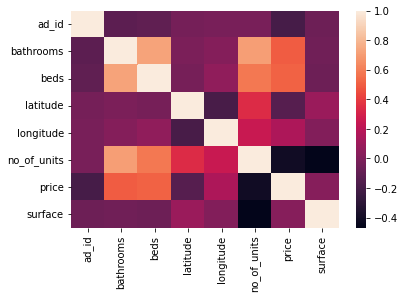

In [18]:
# calculate the correlation matrix
corr = df_train.corr()

# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns);

## Data Preparation

In [19]:
drop_features = ['ad_id','area','ber_classification','property_category','property_type','property_category','description_block', 'features','no_of_units','facility', 'environment', 'county']

df_train_p = df_train.drop(drop_features, axis=1)
df_test_p = df_test.drop(drop_features, axis=1)

In [20]:
print(df_train_p.select_dtypes(exclude=['object']).isna().sum())

bathrooms     51
beds          51
latitude       0
longitude      0
price         90
surface      551
dtype: int64


In [21]:
df_train_p = df_train_p.dropna(how = 'any')
df_train_p.drop(df_train_p[df_train_p['beds'] == 0].index, inplace = True)
df_train_p.drop(df_train_p[df_train_p['bathrooms'] == 0].index, inplace = True)

print(df_train_p.select_dtypes(exclude=['object']).isna().sum())

bathrooms    0
beds         0
latitude     0
longitude    0
price        0
surface      0
dtype: int64


In [22]:
def plot_box_hist(dframe, features):
    '''Function to plot Box / Histogram pair for any feature'''
    no_feats = len(features)
  
    figH = plt.figure(figsize=(30,no_feats*5))

    for i in range(0, no_feats): 
        ax1 = figH.add_subplot(no_feats, 2, (i*2)+1)
        ax1.set_title("Boxplot of "+features[i])
        dframe.boxplot(column=[features[i]])

        ax2 = figH.add_subplot(no_feats, 2, (i*2)+2)
        ax2.set_title("Histogram of "+features[i])
        dframe[features[i]].hist(bins=20)

    plt.show()

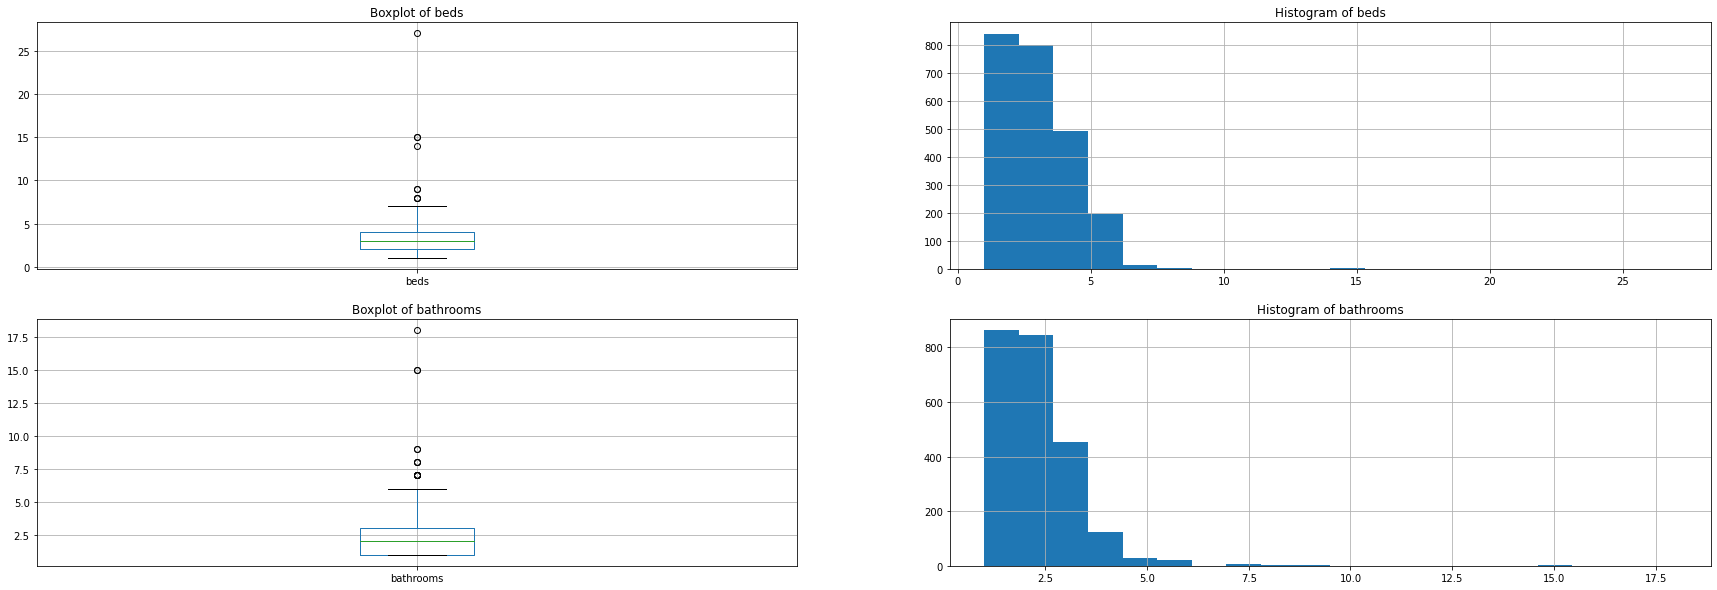

(2349, 6)


In [23]:

#Select features to include in plots
include_featues = ['beds','bathrooms']

#run print function
plot_box_hist(df_train_p, include_featues)
print(df_train_p.shape)

*Note : We can see presence of outliers*
So we will remove them

In [24]:

# Function to Detection Outlier on one-dimentional datasets.
def remove_outliers(dframe, feature):
    '''Function to Detect / Remove Outliers'''
  
    #define a list to accumlate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(dframe[feature])
    random_data_mean = np.mean(dframe[feature])
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    
    dframe = dframe.drop(dframe[(dframe[feature] < lower_limit) | (dframe[feature] > upper_limit)].index)

    return dframe

After outliers have been removed


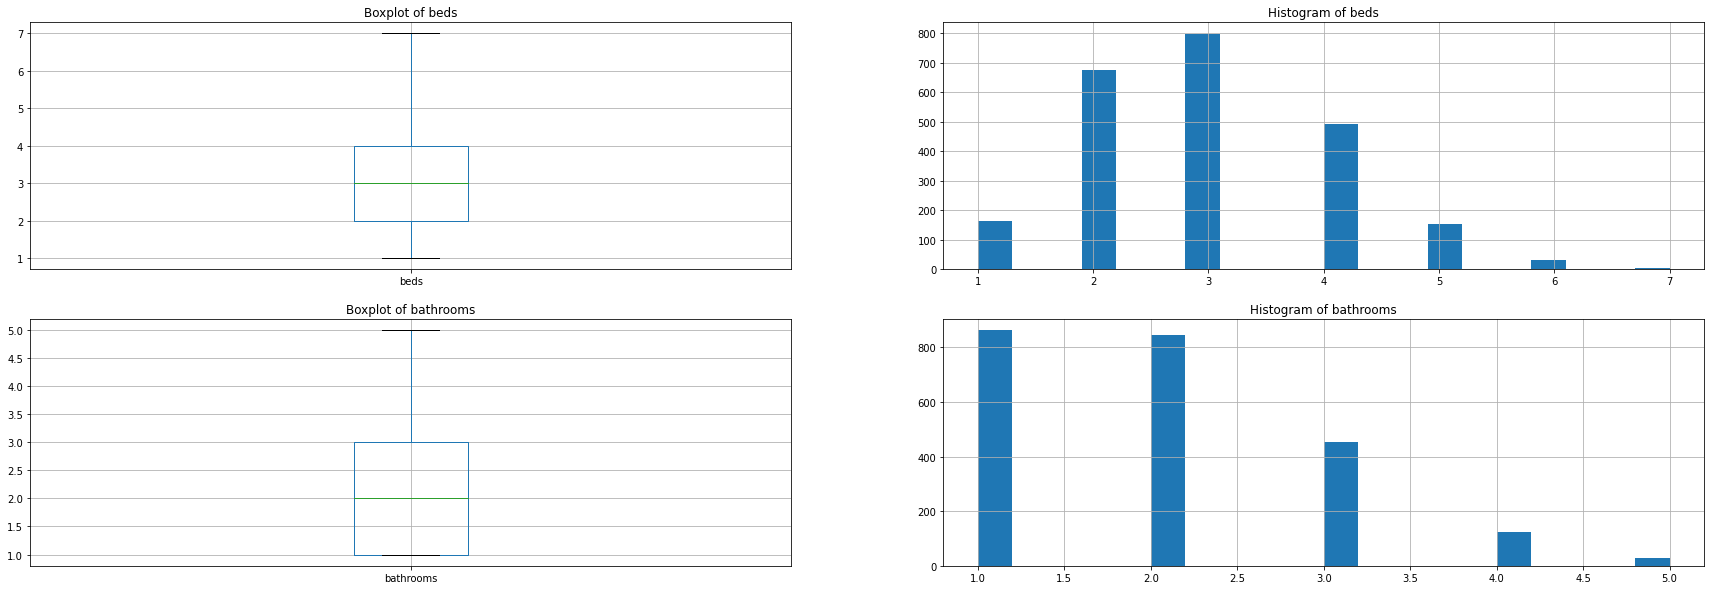

(2314, 6)


In [25]:
print("After outliers have been removed")
for i in range(0, len(include_featues)): 
    df_train_p = remove_outliers(df_train_p,include_featues[i])
    #df_test_p = remove_outliers(df_test_p,include_featues[i])

#run print function
plot_box_hist(df_train_p, include_featues)
print(df_train_p.shape)

In [26]:
# show first data frame rows 
df_train_p.head(10)

,bathrooms,beds,latitude,longitude,price,surface
15,3.0,5.0,53.400454,-6.445730,935000.0,321.0
26,4.0,4.0,53.316410,-6.385214,485000.0,144.0
27,3.0,5.0,53.401414,-6.446634,935000.0,321.0
35,5.0,5.0,53.375377,-6.056749,1475000.0,312.0
38,2.0,2.0,53.372130,-6.338466,410000.0,83.0
42,4.0,5.0,53.275379,-6.282236,1295000.0,280.0
60,2.0,5.0,53.375467,-6.062246,980000.0,202.0
61,2.0,3.0,53.246732,-6.174917,850000.0,150.0
62,5.0,5.0,53.237369,-6.131476,2950000.0,656.0
64,3.0,5.0,53.267398,-6.179427,2500000.0,319.0


In [27]:
# show first data frame rows 
df_test_p.head(10)

,bathrooms,beds,latitude,longitude,surface
0,2.0,4.0,53.566881,-6.101148,142.0
1,2.0,3.0,53.362992,-6.452909,114.0
2,3.0,4.0,53.454198,-6.262964,172.0
3,4.0,3.0,53.354402,-6.458647,132.4
4,1.0,3.0,53.336530,-6.393587,88.0
5,2.0,3.0,53.388876,-6.190721,98.0
6,1.0,2.0,53.385727,-6.142505,80.3
7,2.0,5.0,53.316760,-6.221188,212.0
8,2.0,2.0,53.275403,-6.298005,67.2
9,2.0,3.0,53.289384,-6.189869,97.4


In [28]:
# Generate descriptive statistics
df_cost = df_cost.drop("Id", axis=1)
df_cost.head()

,Expected
0,875000.0
1,355000.0
2,440000.0
3,425000.0
4,265000.0


In [29]:

print(df_train_p.shape)
print(df_test_p.shape)
print(df_cost.shape)

(2314, 6)
(500, 5)
(500, 1)


## Training & Test Data

In [ ]:
# # split data into training and test
# from sklearn.model_selection import train_test_split

# # training: 70% (0.7), test: 30% (0.3) 
# # you could try any other combination 
# # but consider 50% of training as the low boundary
# X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)

### Train dataset

In [ ]:
# # training dataset: 
# training_file = syntPath+filename1
# # test dataset: 
# testing_file = syntPath+filename2
# # cost dataset: 
# cost_file = syntPath+filename3

In [ ]:
# show first data frame rows 
# dftrain.head()

In [ ]:
# Generate descriptive statistics
# dftrain.describe()

### Test dataset

In [ ]:
# show first data frame rows 
# dftest.head()

In [ ]:
# Generate descriptive statistics
# dftest.describe()

### Expected Cost dataset

In [ ]:
# Generate descriptive statistics
# dfcost.describe()

# PIECEWISE REGRESSION

In [30]:
# split data into training and test
from sklearn.model_selection import train_test_split

X = df_train_p.drop("price",axis=1)
y = df_train_p["price"]

# training: 70% (0.7), test: 30% (0.3)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)

In [32]:
# train set, input columns
Xs_train = X_train
# train set, output column, cost
ys_train = y_train.values.reshape(-1,1) 

# test set, input columns
Xs_test = df_test_p.iloc[:,0:].values 
# test set, output column, cost
y_test = df_cost.Expected.values

In [33]:
# StandardScaler() will normalize the features i.e. each column of X, 
# so, each column/feature/variable will have μ = 0 and σ = 1
sc = StandardScaler()

# Xss_train = np.hstack([Xs_train,Xs_train[:,[2]]**2])
xscaler = sc.fit(Xs_train)
Xn_train = xscaler.transform(Xs_train)

#Xss_test = np.hstack([Xs_test,Xs_test[:,[2]]**2])
Xn_test = xscaler.transform(Xs_test)

ylog = np.log(ys_train.astype('float'))
yscaler = StandardScaler().fit(ylog)
yn_train = yscaler.transform(ylog)

## Full Model

In [ ]:
# select some features columns just for the baseline model
# assume not all of the features are informative or useful
# in this exercise you could try all of them if possible

featrain = ['feature_1','feature_2','feature_3','cost']
# dropna: remove missing values
df_subset_train = dftrain[featrain].dropna(axis=0)

featest = ['feature_1','feature_2','feature_3']
df_subset_test  =  dftest[featest].dropna(axis=0)

# cost
df_cost = df_cost[df_cost.index.isin(df_subset_test.index)]

In [34]:
# model
with pm.Model() as model:
    #prior over the parameters of linear regression
    alpha = pm.Normal('alpha', mu=0, sigma=30)
    #we have one beta for each column of Xn
    beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn_train.shape[1])
    #prior over the variance of the noise
    sigma = pm.HalfCauchy('sigma_n', 5)
    #linear regression model in matrix form
    mu = alpha + pm.math.dot(beta, Xn_train.T)
    #likelihood, be sure that observed is a 1d vector
    like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn_train[:,0])
    

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Finished [100%]: Average Loss = 1,517.8


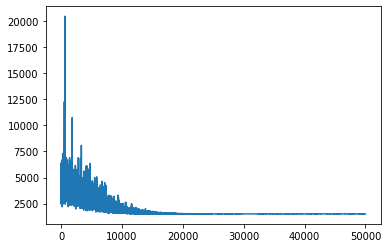

In [35]:
#number of iterations of the algorithms
iter = 50000 

# run the model
with model:
    approximation = pm.fit(iter,method='advi')
    
# check the convergence
plt.plot(approximation.hist);

In [36]:
# samples from the posterior
posterior = approximation.sample(5000)

In [37]:
# prediction
ll=np.mean(posterior['alpha']) + np.dot(np.mean(posterior['beta'],axis=0), Xn_test.T)
y_pred_BLR = np.exp(yscaler.inverse_transform(ll.reshape(-1,1)))[:,0]
print("MAE = ",(np.mean(abs(y_pred_BLR - y_test))))
print("MAPE = ",(np.mean(abs(y_pred_BLR - y_test) / y_test)))

MAE =  204649.3985441904
MAPE =  0.28584471095095515


## Clustering

### Full Model

In [ ]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4)


### Clusters

In [ ]:
# train clusters



In [ ]:
# test clusters


## Piecewise Model

In [ ]:
# model_0
with pm.Model() as model_0:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn0
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn0.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn0.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn0[:,0])



##Simulations

### Only Cluster 0

## Overall

## Test set performance

### PPC on the Test set



# SUMMARY

## References

## Bibliography

Setia, M., 2020. Exploratory Data Analysis : The Tool Understand Your Data. [online] Analytics Vidhya. Available at: <https://www.analyticsvidhya.com/blog/2020/10/the-clever-ingredient-that-decide-the-rise-and-the-fall-of-your-machine-learning-model-exploratory-data-analysis/>.

